# TimeSeries Analysis Day 66 Lecture 2 Assignment

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
web_events = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/web_events.csv')

## Web Events Data

In [4]:
web_events

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [5]:
web_events['timestamp'] = pd.to_datetime(web_events['timestamp'], unit='ms')
web_events

In [12]:
web_events['year'] = web_events.timestamp.dt.year
web_events['month'] = web_events.timestamp.dt.month
web_events['day'] = web_events.timestamp.dt.day
web_events['weekday'] = web_events.timestamp.dt.strftime('%A')
web_events['hour'] = web_events.timestamp.dt.hour
web_events['minute'] = web_events.timestamp.dt.minute
web_events['date'] = web_events['timestamp'].dt.round('D')
web_events

,timestamp,visitorid,event,itemid,transactionid,year,month,day,weekday,hour,minute,date
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015,6,2,Tuesday,5,2,2015-06-02
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,2015,6,2,Tuesday,5,50,2015-06-02
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,2015,6,2,Tuesday,5,13,2015-06-02
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,2015,6,2,Tuesday,5,12,2015-06-02
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,2015,6,2,Tuesday,5,2,2015-06-02
...,...,...,...,...,...,...,...,...,...,...,...,...
2756096,2015-08-01 03:13:05.939,591435,view,261427,NaN,2015,8,1,Saturday,3,13,2015-08-01
2756097,2015-08-01 03:30:13.142,762376,view,115946,NaN,2015,8,1,Saturday,3,30,2015-08-01
2756098,2015-08-01 02:57:00.527,1251746,view,78144,NaN,2015,8,1,Saturday,2,57,2015-08-01
2756099,2015-08-01 03:08:50.703,1184451,view,283392,NaN,2015,8,1,Saturday,3,8,2015-08-01


In [13]:
for col in web_events.columns:
    count = web_events.groupby(by=col).count().shape[0]
    print(col, count)

timestamp 2750455
visitorid 1407580
event 3
itemid 235061
transactionid 17672
year 1
month 5
day 31
weekday 7
hour 24
minute 60
date 139


In [16]:
grouped_data = web_events.groupby(by=web_events.timestamp.dt.round('H')).count()

In [17]:
grouped_data

,timestamp,visitorid,event,itemid,transactionid,year,month,day,weekday,hour,minute,date
timestamp,,,,,,,,,,,,
2015-05-03 03:00:00,493,493,493,493,1,493,493,493,493,493,493,493
2015-05-03 04:00:00,1005,1005,1005,1005,3,1005,1005,1005,1005,1005,1005,1005
2015-05-03 05:00:00,893,893,893,893,7,893,893,893,893,893,893,893
2015-05-03 06:00:00,693,693,693,693,3,693,693,693,693,693,693,693
2015-05-03 07:00:00,342,342,342,342,5,342,342,342,342,342,342,342
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-17 23:00:00,583,583,583,583,0,583,583,583,583,583,583,583
2015-09-18 00:00:00,502,502,502,502,2,502,502,502,502,502,502,502
2015-09-18 01:00:00,495,495,495,495,4,495,495,495,495,495,495,495


## Life Expectancy Data

In [21]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/life_expectancy.csv')

In [22]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576000,74.725000,74.87200,75.016,75.15800,75.299000,75.440000,75.582000,75.725000,75.867000
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694000,60.243000,60.75400,61.226,61.66600,62.086000,62.494000,62.895000,63.288000,63.673000
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096000,56.189000,57.23100,58.192,59.04200,59.770000,60.373000,60.858000,61.241000,61.547000
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656000,75.943000,76.28100,76.652,77.03100,77.389000,77.702000,77.963000,78.174000,78.345000
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.197561,69.397561,69.64878,69.900,70.14878,70.497561,70.797561,71.097561,71.346341,71.646341
260,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,34.361,34.471,34.739,35.187,35.815,36.597,...,62.552000,62.888000,63.20800,63.508,63.78600,64.046000,64.291000,64.523000,64.743000,64.953000
261,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.215,52.559,52.894,53.229,53.571,53.926,...,53.010000,53.720000,54.70100,55.888,57.20100,58.545000,59.830000,60.993000,61.981000,62.774000
262,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,45.124,45.502,45.869,46.225,46.574,46.929,...,52.313000,53.749000,55.19400,56.588,57.87200,59.011000,59.982000,60.775000,61.397000,61.874000


In [25]:
other_cols = ['Country Name','Country Code', 'Indicator Name', 'Indicator Code']
year_cols = set(df.columns) - set(other_cols)

melt_df = df.melt(id_vars=other_cols, var_name='Year', value_name='Expectancy')
melt_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,65.662000
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.292000
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,33.251000
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.279000
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,NaN
...,...,...,...,...,...,...
15043,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,71.646341
15044,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,64.953000
15045,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,62.774000
15046,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,61.874000


In [31]:
print('Percentage of null information')
melt_df.isna().sum() / melt_df.count() * 100

Percentage of null information


Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
Year              0.000000
Expectancy        9.463883
dtype: float64

In [46]:
missing_data = melt_df.loc[melt_df.Expectancy.isna(), 'Country Name'].value_counts()

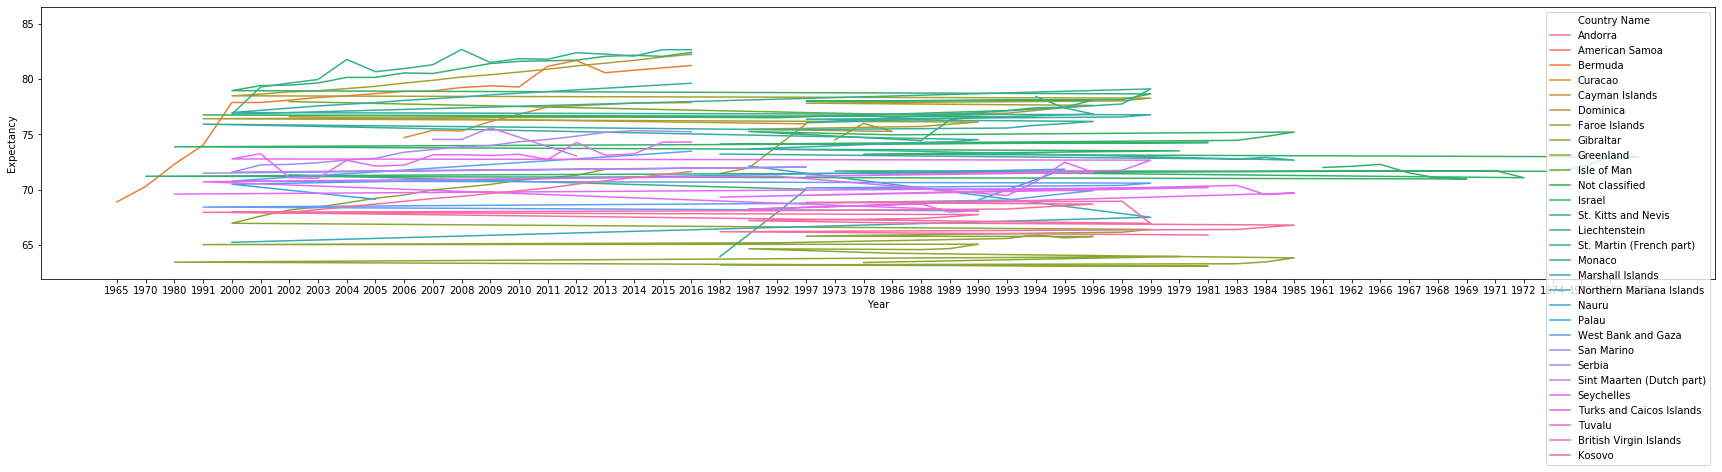

In [52]:
plt.figure(figsize=(30,5))
sns.lineplot(x='Year', y='Expectancy', hue='Country Name', data=melt_df.loc[melt_df['Country Name'].isin(missing_data.index)])

In [57]:
imputated_expectancy = melt_df.Expectancy.fillna(melt_df.Expectancy.mean())
melt_df = melt_df.assign(imputated_expectancy=imputated_expectancy)
melt_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Expectancy,imputated_expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,65.662000,65.662000
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.292000,32.292000
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,33.251000,33.251000
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.279000,62.279000
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,NaN,63.544406
...,...,...,...,...,...,...,...
15043,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,71.646341,71.646341
15044,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,64.953000,64.953000
15045,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,62.774000,62.774000
15046,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,61.874000,61.874000


In [59]:
interpolated_expectancy = melt_df.Expectancy.fillna(method='ffill')
melt_df = melt_df.assign(interpolated_expectancy=interpolated_expectancy)
melt_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Expectancy,imputated_expectancy,interpolated_expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,65.662000,65.662000,65.662000
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.292000,32.292000,32.292000
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,33.251000,33.251000,33.251000
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.279000,62.279000,62.279000
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,NaN,63.544406,62.279000
...,...,...,...,...,...,...,...,...
15043,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,71.646341,71.646341,71.646341
15044,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,64.953000,64.953000,64.953000
15045,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,62.774000,62.774000,62.774000
15046,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,61.874000,61.874000,61.874000


In [61]:
dropped_expectancy = melt_df.dropna()
dropped_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Expectancy,imputated_expectancy,interpolated_expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,65.662000,65.662000,65.662000
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.292000,32.292000,32.292000
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,33.251000,33.251000,33.251000
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.279000,62.279000,62.279000
5,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,46.825065,46.825065,46.825065
...,...,...,...,...,...,...,...,...
15043,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,71.646341,71.646341,71.646341
15044,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,64.953000,64.953000,64.953000
15045,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,62.774000,62.774000,62.774000
15046,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,61.874000,61.874000,61.874000


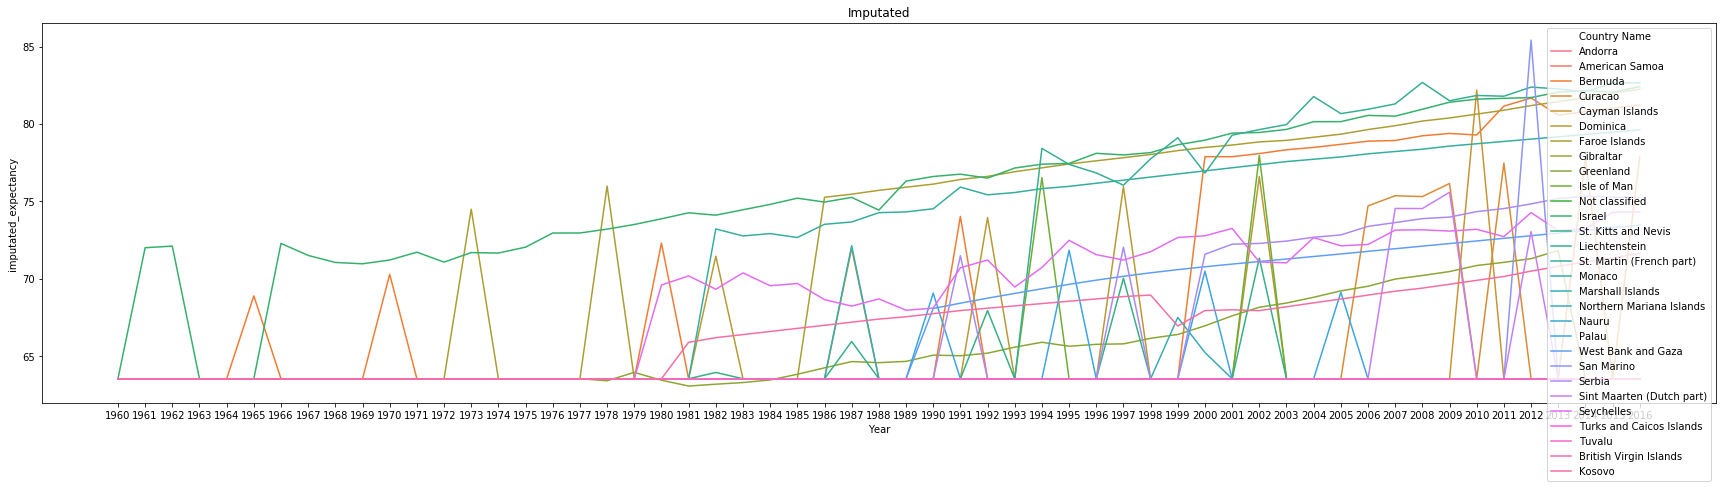

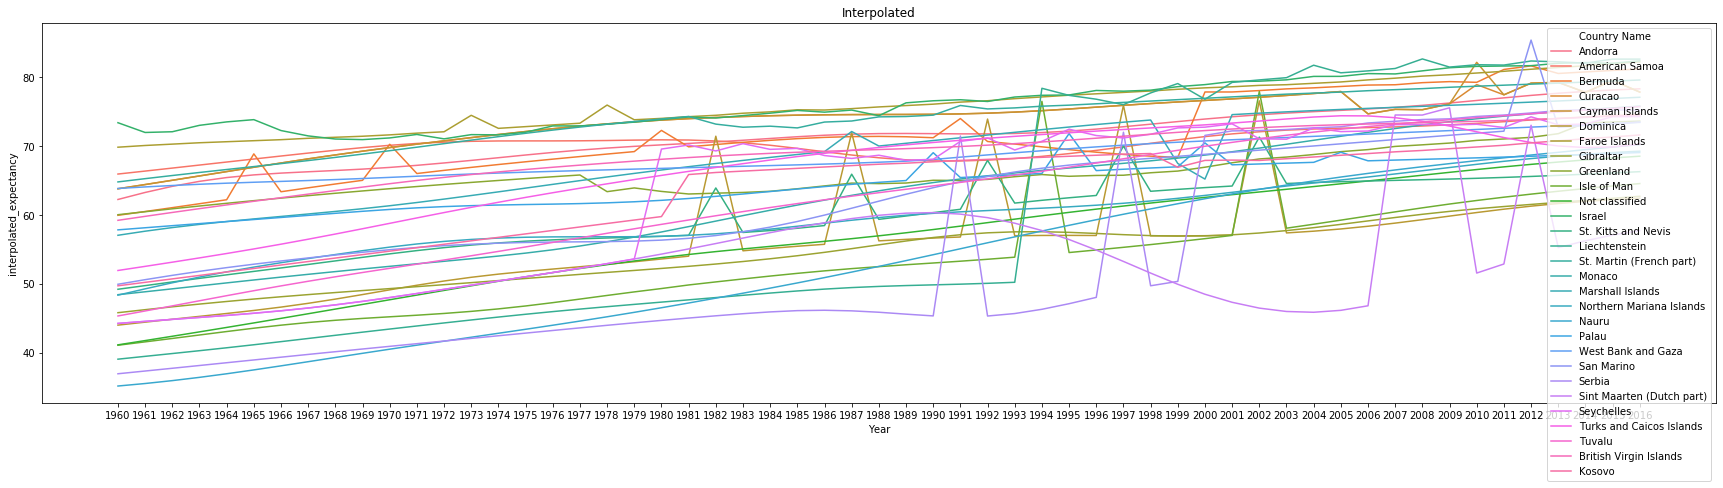

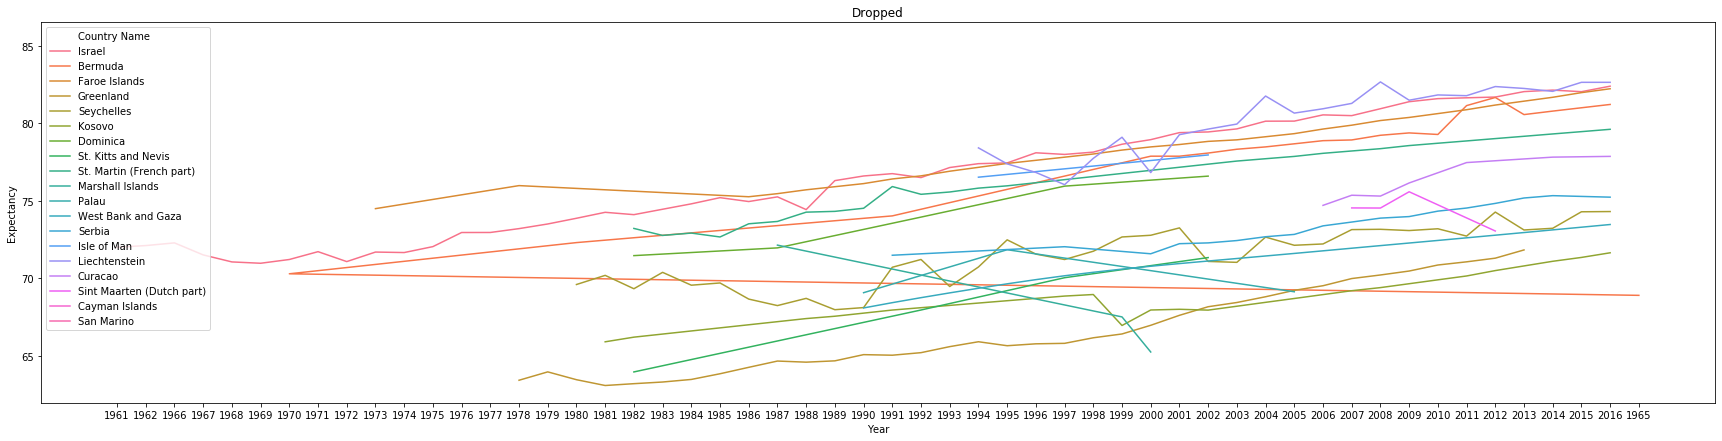

In [63]:
plt.figure(figsize=(30,7))
sns.lineplot(x='Year', y='imputated_expectancy', hue='Country Name', data=melt_df.loc[melt_df['Country Name'].isin(missing_data.index)])
plt.title('Imputated')
plt.show()

plt.figure(figsize=(30,7))
sns.lineplot(x='Year', y='interpolated_expectancy', hue='Country Name', data=melt_df.loc[melt_df['Country Name'].isin(missing_data.index)])
plt.title('Interpolated')
plt.show()

plt.figure(figsize=(30,7))
sns.lineplot(x='Year', y='Expectancy', hue='Country Name', data=dropped_expectancy.loc[dropped_expectancy['Country Name'].isin(missing_data.index)])
plt.title('Dropped')
plt.show()